In [100]:
indexed_verbs={'Add': 0, 'Adjust': 1, 'Break': 2, 'Check': 3, 'Close': 4, 'Cook': 5, 'Crack': 6, 'Cut': 7, 'Fill': 8, 
        'Flip': 9, 'Fold': 10, 'Gently': 11, 'Get': 12, 'Heat': 13, 'Leave': 14, 'Lift': 15, 'Mix': 16, 'Peel': 17, 
        'Place': 18, 'Pour': 19, 'Put': 20, 'Remove': 21, 'Simmer': 22, 'Steep': 23, 'Stir': 24, 'Taste': 25, 'Throw': 26, 
        'Tilt': 27, 'Toss': 28, 'Transfer': 29, 'Turn': 30,'Visually': 31, 'Wait': 32, 'Warm': 33, 'Wash': 34, 'Whisk': 35, 'Wipe': 36} 

In [101]:
import pickle as pkl
data = pkl.load(open('data/learning/raw_data_action_grouped.pkl', 'rb'))

In [102]:
from EgoExo4D_Dataset import EgoExo4d
egoexo4d = EgoExo4d()  
videos=egoexo4d.video_names
novice = [v for v in videos if egoexo4d.rootdir2proficiency[v]=="Novice"]
ee = [v for v in videos if egoexo4d.rootdir2proficiency[v]=="Early Expert"]
ie = [v for v in videos if egoexo4d.rootdir2proficiency[v]=="Intermediate Expert"]
print(len(novice), len(ee), len(ie))

# Novice- number of action frames

In [105]:
n_actions = {f"n_{action}":0 for action in indexed_verbs.keys()}
for video in novice:
    for action in data[video]:
        if action == 'all':
            continue
        n_actions[f"n_{action}"]+= len(data[video][action])

# Early Expert - number of action frames

In [106]:
ee_actions = {f"ee_{action}":0 for action in indexed_verbs.keys()}
for video in ee:
    for action in data[video]:
        if action == 'all':
            continue
        ee_actions[f"ee_{action}"]+= len(data[video][action])

# Intermediate Expert - number of action frames

In [107]:
ie_actions = {f"ie_{action}":0 for action in indexed_verbs.keys()}
for video in ie:
    for action in data[video]:
        if action == 'all':
            continue
        ie_actions[f"ie_{action}"]+= len(data[video][action])

# Visualization

/tmp/ipykernel_16644/2098295268.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actions, y=counts, palette='viridis')


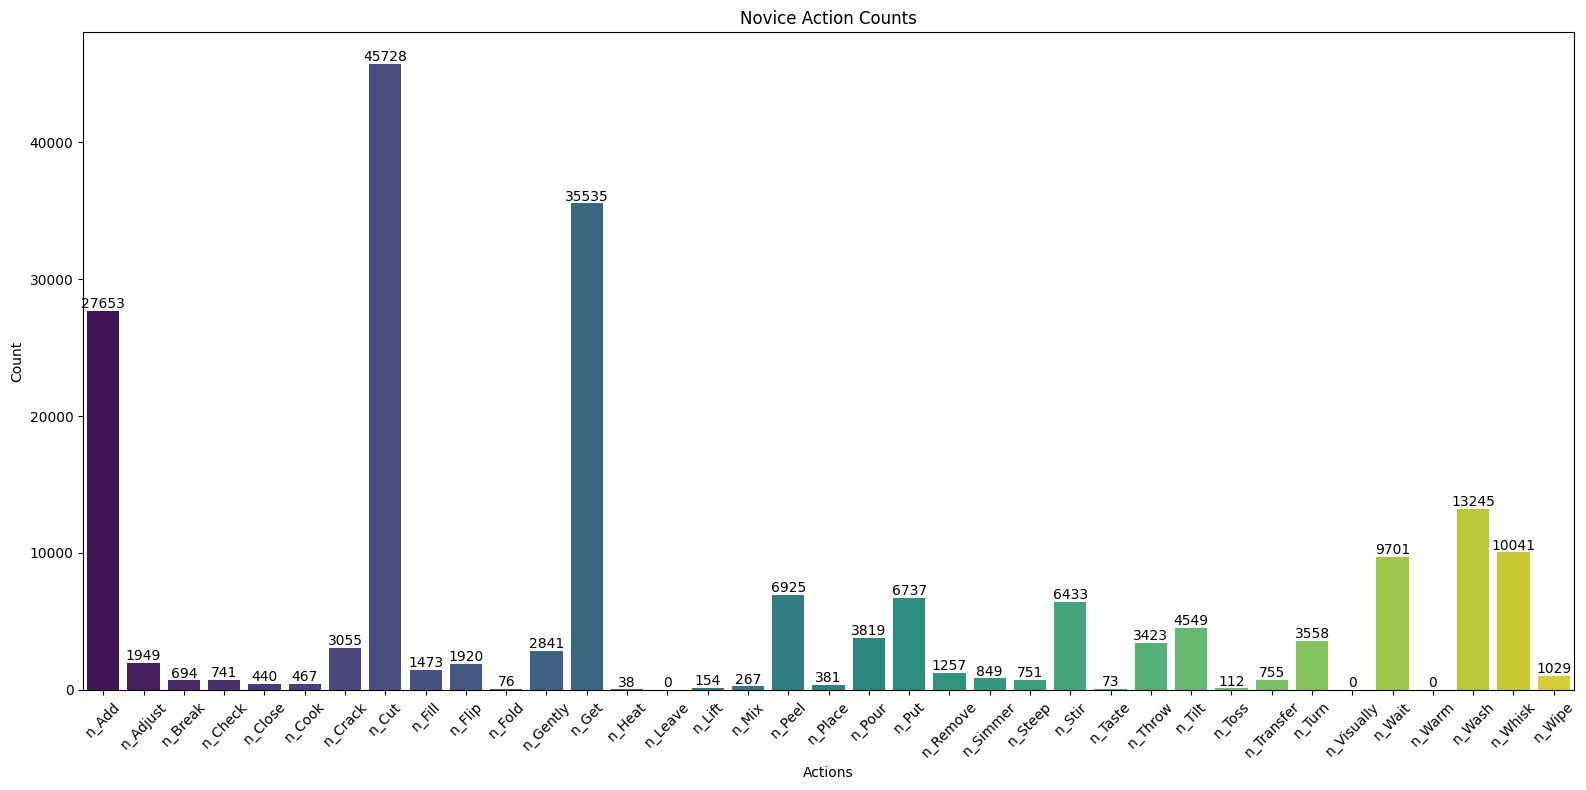

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

actions = list(n_actions.keys())
counts = list(n_actions.values())

plt.figure(figsize=(16, 8))
sns.barplot(x=actions, y=counts, palette='viridis')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Novice Action Counts')
plt.xticks(rotation=45)  

for i in range(len(counts)):
    plt.text(i, counts[i] + 200, counts[i], ha='center')

plt.tight_layout()  


/tmp/ipykernel_16644/1050701665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actions, y=counts, palette='viridis')


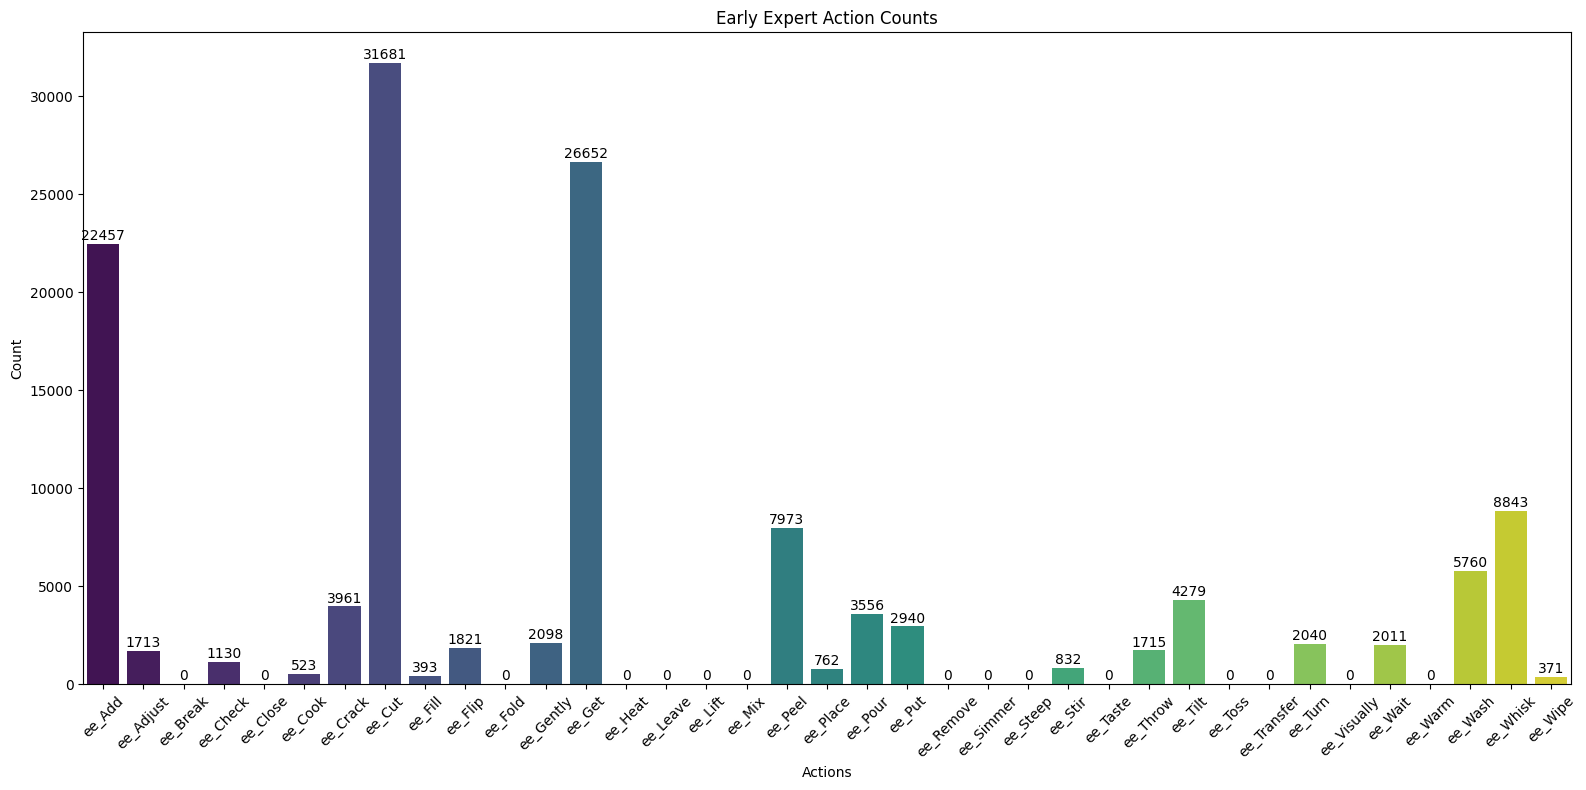

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

actions = list(ee_actions.keys())
counts = list(ee_actions.values())

plt.figure(figsize=(16, 8))
sns.barplot(x=actions, y=counts, palette='viridis')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Early Expert Action Counts')
plt.xticks(rotation=45)  

for i in range(len(counts)):
    plt.text(i, counts[i] + 200, counts[i], ha='center')

plt.tight_layout()  


/tmp/ipykernel_16644/1199641361.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actions, y=counts, palette='viridis')


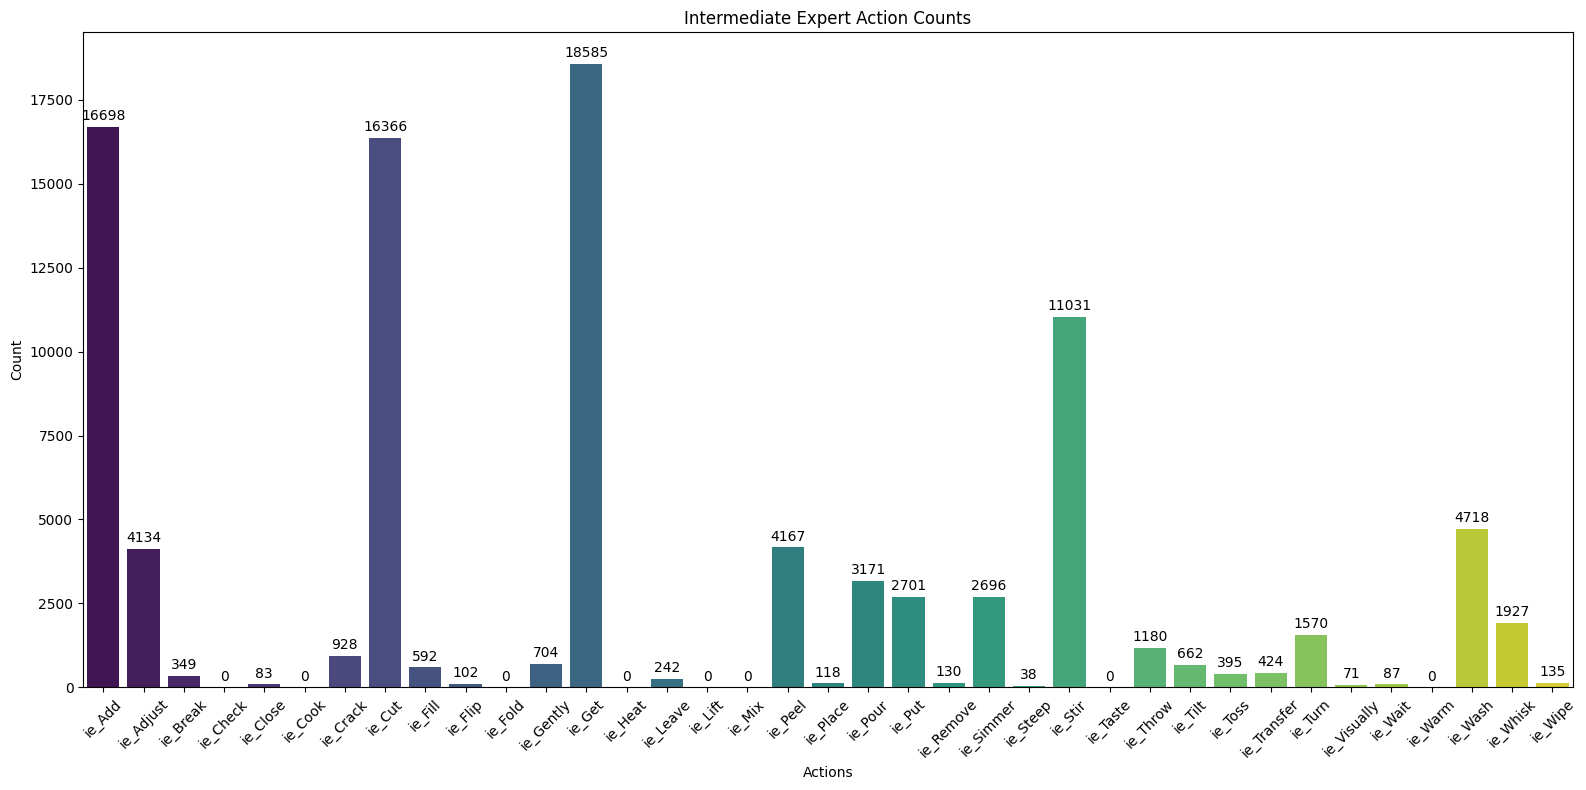

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

actions = list(ie_actions.keys())
counts = list(ie_actions.values())

plt.figure(figsize=(16, 8))
sns.barplot(x=actions, y=counts, palette='viridis')
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Intermediate Expert Action Counts')
plt.xticks(rotation=45)  

for i in range(len(counts)):
    plt.text(i, counts[i] + 200, counts[i], ha='center')

plt.tight_layout()  


### Number of Frames

In [111]:
n_lessthan300 = []
n_lessthan1000 = []
n_lessthan5000 = []
n_morethan5000 = []
for action in n_actions:
    if n_actions[action] <300:
        n_lessthan300.append(action[2:])
    elif n_actions[action]<1000:
        n_lessthan1000.append(action[2:])
    elif n_actions[action] <5000:
        n_lessthan5000.append(action[2:])
    else:
        n_morethan5000.append(action[2:])
        
print("Less than 300",n_lessthan300)
print("Less than 1000",n_lessthan1000)
print("Less than 5000",n_lessthan5000)
print("More than 5000",n_morethan5000)

Less than 300 ['Fold', 'Heat', 'Leave', 'Lift', 'Mix', 'Taste', 'Toss', 'Visually', 'Warm']
Less than 1000 ['Break', 'Check', 'Close', 'Cook', 'Place', 'Simmer', 'Steep', 'Transfer']
Less than 5000 ['Adjust', 'Crack', 'Fill', 'Flip', 'Gently', 'Pour', 'Remove', 'Throw', 'Tilt', 'Turn', 'Wipe']
More than 5000 ['Add', 'Cut', 'Get', 'Peel', 'Put', 'Stir', 'Wait', 'Wash', 'Whisk']


In [112]:
ee_lessthan300 = []
ee_lessthan1000 = []
ee_lessthan5000 = []
ee_morethan5000 = []
for action in ee_actions:
    if ee_actions[action] <300:
        ee_lessthan300.append(action[3:])
    elif ee_actions[action]<1000:
        ee_lessthan1000.append(action[3:])
    elif ee_actions[action] <5000:
        ee_lessthan5000.append(action[3:])
    else:
        ee_morethan5000.append(action[3:])
        
print("Less than 300",ee_lessthan300)
print("Less than 1000",ee_lessthan1000)
print("Less than 5000",ee_lessthan5000)
print("More than 5000",ee_morethan5000)

Less than 300 ['Break', 'Close', 'Fold', 'Heat', 'Leave', 'Lift', 'Mix', 'Remove', 'Simmer', 'Steep', 'Taste', 'Toss', 'Transfer', 'Visually', 'Warm']
Less than 1000 ['Cook', 'Fill', 'Place', 'Stir', 'Wipe']
Less than 5000 ['Adjust', 'Check', 'Crack', 'Flip', 'Gently', 'Pour', 'Put', 'Throw', 'Tilt', 'Turn', 'Wait']
More than 5000 ['Add', 'Cut', 'Get', 'Peel', 'Wash', 'Whisk']


In [113]:
ie_lessthan300 = []
ie_lessthan1000 = []
ie_lessthan5000 = []
ie_morethan5000 = []
for action in ie_actions:
    if ie_actions[action] <300:
        ie_lessthan300.append(action[3:])
    elif ie_actions[action]<1000:
        ie_lessthan1000.append(action[3:])
    elif ie_actions[action] <5000:
        ie_lessthan5000.append(action[3:])
    else:
        ie_morethan5000.append(action[3:])
        
print("Less than 300",ie_lessthan300)
print("Less than 1000",ie_lessthan1000)
print("Less than 5000",ie_lessthan5000)
print("More than 5000",ie_morethan5000)

Less than 300 ['Check', 'Close', 'Cook', 'Flip', 'Fold', 'Heat', 'Leave', 'Lift', 'Mix', 'Place', 'Remove', 'Steep', 'Taste', 'Visually', 'Wait', 'Warm', 'Wipe']
Less than 1000 ['Break', 'Crack', 'Fill', 'Gently', 'Tilt', 'Toss', 'Transfer']
Less than 5000 ['Adjust', 'Peel', 'Pour', 'Put', 'Simmer', 'Throw', 'Turn', 'Wash', 'Whisk']
More than 5000 ['Add', 'Cut', 'Get', 'Stir']


In [114]:
# do not consider verbs that are included in "less than 300"
n_survived = n_lessthan1000+n_lessthan5000+n_morethan5000
ee_survived = ee_lessthan1000+ee_lessthan5000+ee_morethan5000
ie_survived = ie_lessthan1000+ie_lessthan5000+ie_morethan5000

survived_intersection = [set(n_survived) & set(ee_survived) & set(ie_survived) ]
print("Words to consider (with different frames)")
print(survived_intersection)

Words to consider (with different frames)
[{'Fill', 'Add', 'Crack', 'Gently', 'Whisk', 'Tilt', 'Wash', 'Throw', 'Turn', 'Peel', 'Get', 'Stir', 'Put', 'Cut', 'Adjust', 'Pour'}]


In [115]:
lessthan1000_intersection = [set(n_lessthan1000) & set(ee_lessthan1000) & set(ie_lessthan1000) ]
print(lessthan1000_intersection)
lessthan5000_intersection = [set(n_lessthan5000) & set(ee_lessthan5000) & set(ie_lessthan5000) ]
print(lessthan5000_intersection)

[set()]
[{'Throw', 'Adjust', 'Turn', 'Pour'}]


In [116]:
verbs = ['All', 'Add', 'Cut', 'Get', 'Peel', 'Pour', 'Put', 'Stir', 'Wash', 'Throw', 'Turn']
ws_600 = [46.8, 58.89, 55.41, 51.52, 0, 0, 0, 0, 0, 0, 0]
ws_300 = [44.67, 48.14, 51.35, 46.68, 59.85, 68.33, 82.06, 73.8, 70.8, 0, 0]
ws_150 = [44.68, 46.03, 49.38, 44.63, 56.84, 59.37, 66.26, 72.36, 68.2, 70.1, 49.78]
ws_50 = [43.56, 46.71, 48.47, 41.16, 54.41, 56.81, 59.93, 72.58, 66.46, 69.65, 48.46]
print(len(verbs), len(ws_600), len(ws_300), len(ws_150), len(ws_50))


11 11 11 11 11


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = [ws_600, ws_300, ws_150, ws_50]

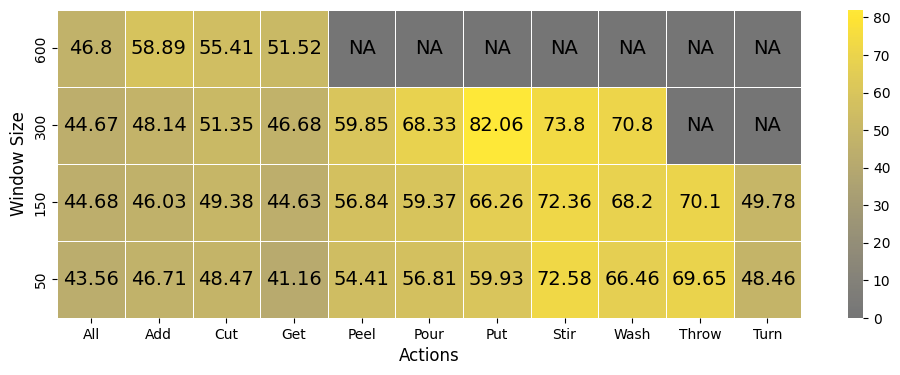

In [124]:
def annot_func(val):
    if val==0:
        return "NA"
    else:
        return str(val)
    
plt.figure(figsize=(12, 4))
ax = sns.heatmap(data, annot=np.vectorize(annot_func)(data), fmt = '', annot_kws={'color':'black', 'fontsize':14}, cmap='cividis', linewidths=0.5, center=5)
# ax.set_title("Performance Analysis of Proficiency Estimation in Cooking Videos by Actions and Window Size")
ax.set_xticklabels(verbs)
ax.set_yticklabels([600, 300, 150, 50])
ax.set_xlabel("Actions",fontsize=12)
ax.set_ylabel("Window Size",fontsize=12)
plt.show()